In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание**

Цель: применить на практике базовые ансамблевые методы

Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)
Этапы работы:

1.Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

2.Подготовьте датасет к обучению моделей.
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html, 
preprocessing.LabelEncoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. 
Старайтесь не использовать для этой задачи циклы.
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

3.Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4.Обучите дерево решений на обучающем множестве. Используйте следующие модели:
a) tree.DecisionTreeClassifier https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
b) ensemble.RandomForestClassifier https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

5.Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

6.Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

7.Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
a) Повторите п. 5

8.Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html. Используйте ensemble.StackingClassifier.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html 
a) Повторите п. 5

9.Сформулируйте выводы по проделанной работе.
a) Сравните метрики построенных моделей.
b) Напишите свое мнение, какая модель наилучшая и почему.

Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.

Результат: получены знания по использованию базовых ансамблевых методов.

**Форма выполнения**:
* ссылка на Jupyter Notebook, загруженный на GitHub
* ссылка на Google Colab
* файл с расширением .ipynb

**Инструменты**:
* Jupyter Notebook/Google Colab;
* GitHub.
* данные с сайта https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
pd.get_dummies, preprocessing.LabelEncoder
модели tree.DecisionTreeClassifier https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html и ensemble.RandomForestClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
metrics.classification_report https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
ensemble.BaggingClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
svm.LinearSVC https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
ensemble.StackingClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html


**Рекомендации к выполнению**:

* Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
* У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
* Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
* Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

# 1.Загрузка данных

In [2]:
raw_data = pd.read_csv('../Sources/heart.csv', sep=',')

**Описание датасета**

Статистические данные о группах домов в Калифорнии, основанные на переписи 1990 года.   


**age**: age of person - возраст пациента [годы]

**Sex**: Male or Female - пол пациента [M: мужчина, F: женщина]

**ChestPinType** : any pain in the area of your chest - тип боли в груди

**ASY** = Asymptomatic - бесимптомная

**NAP** = Non Anginal pain - неангинальная боль

**ATA** = Atypical Angina - атипичная стенокардия

**TA** = Typical Angina - типичная стенокардия

**Restin BP** : Resting Blood Pressure (Hypertension) - артериальное давление в состоянии покоя [мм рт. ст.]

**Cholesterol** : Cholesterol level in the blood - уровень холестерина в крови 

**fasting BS** : A fasting blood sugar (FBS) level is the result of a blood sample taken after a patient fasts for at least eight hours, 1 = if FastingBS > 120 mg/dl, 0 = otherwise - Уровень сахара в крови натощак [1: если уровень сахара в крови натощак> 120 мг / дл, 0: в противном случае]


**Resting ECG**:is a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks - это неинвазивный тест, который может выявить аномалии, включая аритмии, признаки ишемической болезни сердца, гипертрофию левого желудочка и блокаду ножек пучка Гиса.


**MaxHR** : Maximum Heart Rate - достигнутая максимальная частота сердечных сокращений [числовое значение от 60 до 202]

**ExerciseAngina** : If person do angina exercise or not, Y = Yes, N = No - Стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]

**Oldpeak**: ST depression induced by exercise relative to rest - ST числовое значение, измеренное в депрессии

**ST_Slope** : The ST segment shift relative to exercise-induced increments in heart rate - наклон сегмента ST при максимальной нагрузке [Вверх: наклон вверх, плоский: плоский, вниз: наклон вниз]

**HeartDisease** : output class - выходной класс 1: болезнь сердца, 0: норма


In [3]:
raw_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [50]:
group = df.groupby(by='HeartDisease')

In [57]:
group.get_group(1).head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1


In [258]:
df.shape

(918, 13)

In [84]:
colors = ["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"]

In [5]:
df = raw_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [268]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


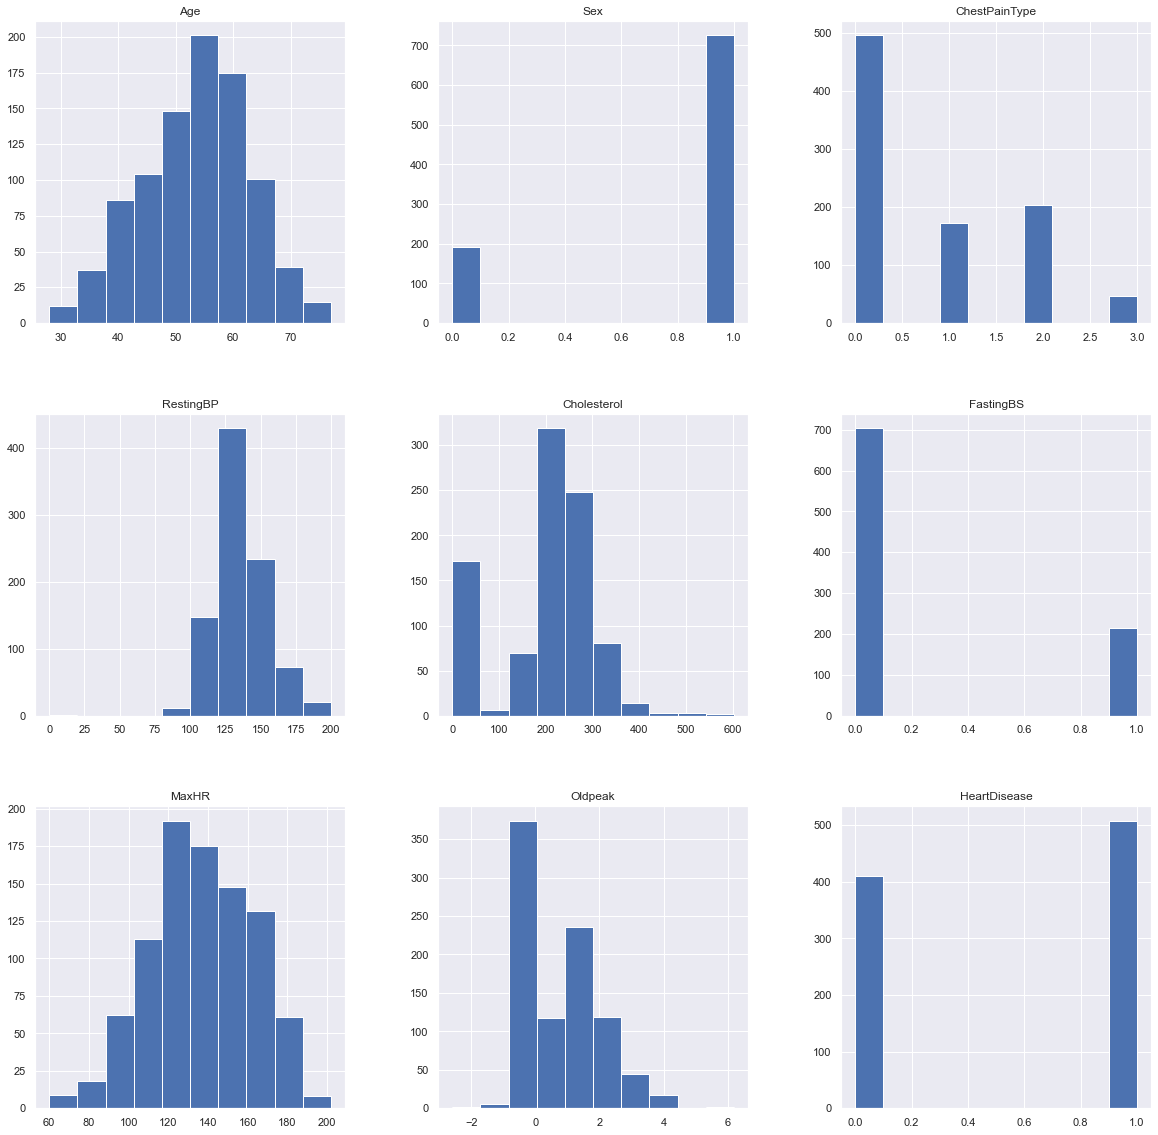

In [269]:
df.hist(figsize=(20,20))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



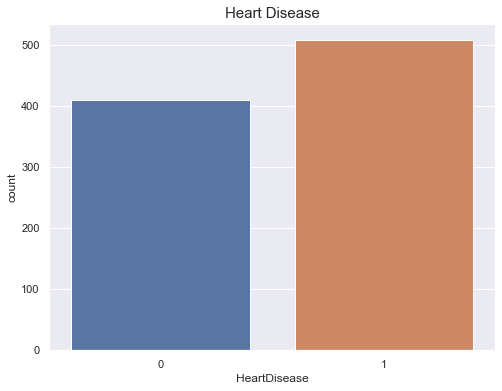

In [255]:
sns.countplot(df["HeartDisease"])
plt.title("Heart Disease",size = 15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



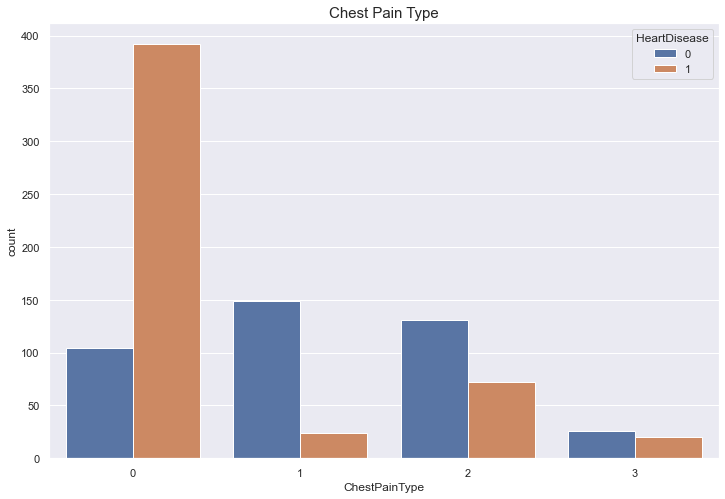

In [259]:
plt.figure(figsize= (12,8))
sns.countplot(df["ChestPainType"], hue= df["HeartDisease"])
plt.title("Chest Pain Type",size = 15)
plt.show()

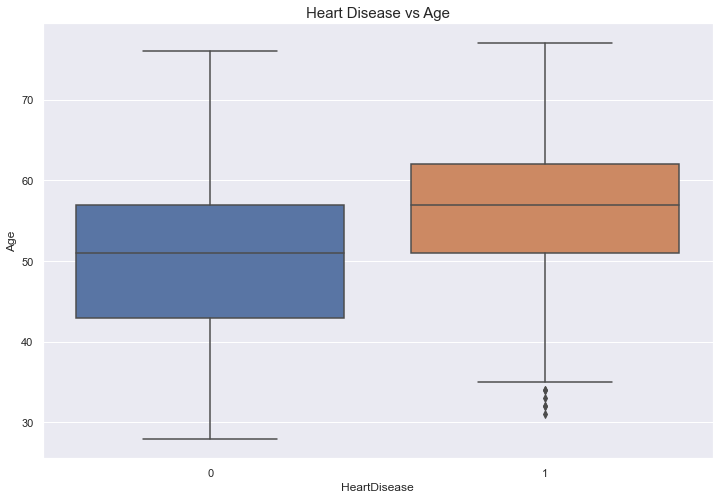

In [260]:
plt.figure(figsize= (12,8))
sns.boxplot(x= df["HeartDisease"], y= df["Age"])
plt.title("Heart Disease vs Age",size = 15)
plt.show()

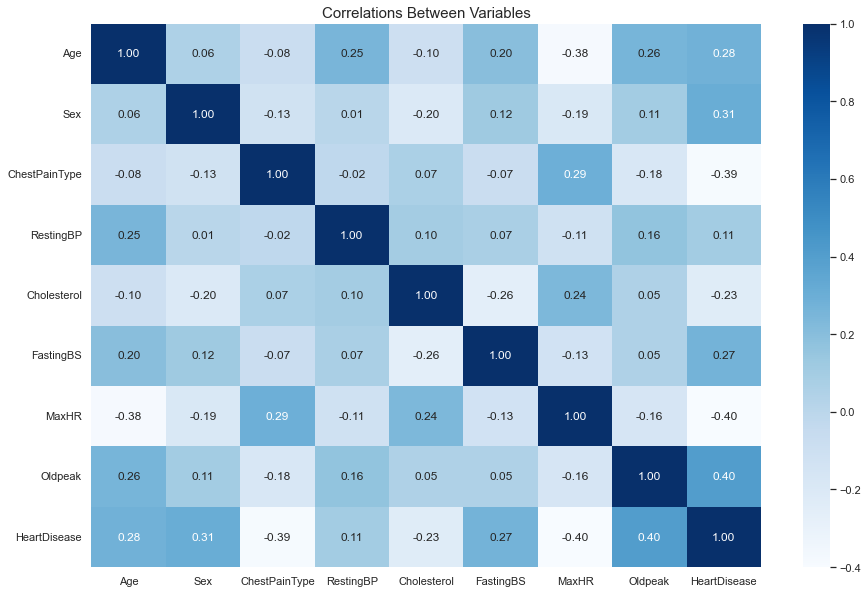

In [261]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), annot= True, fmt= ".2f", cmap="Blues")
plt.title("Correlations Between Variables",size = 15)
plt.show()

In [262]:
a=df.corr()
a.style.background_gradient(cmap="Greens_r")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,0.289123,-0.177377,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.305445,-0.386828,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


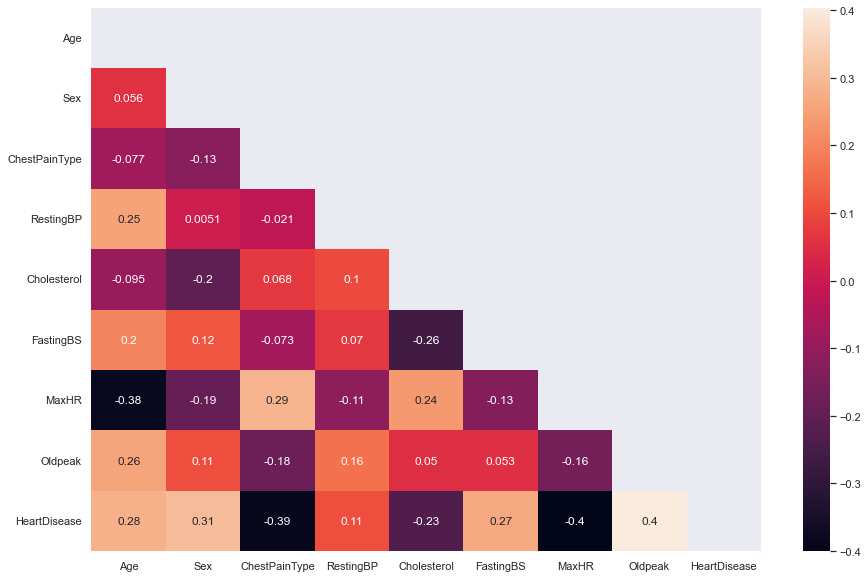

In [267]:
corr=df.corr()
mask=np.triu(corr)

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,mask=mask);

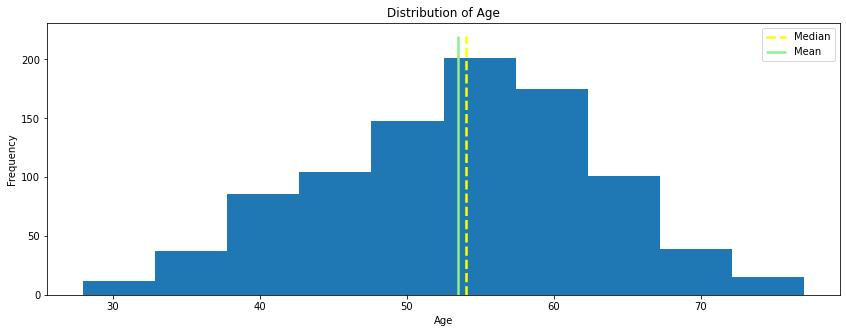

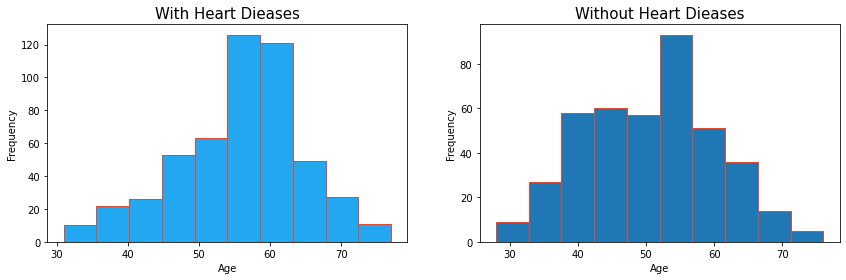

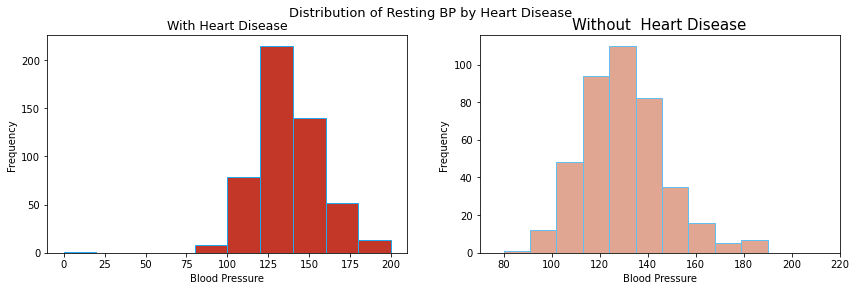

In [127]:
age_median = df.Age.median()
age_mean = df.Age.mean()

group = df.groupby(by='HeartDisease')
heart_disease = group.get_group(1)
without_heart_disease = group.get_group(0)

plt.figure(figsize=(14.2, 5))
plt.hist(df.Age)
plt.vlines(age_median, ymin=0, ymax=220, color='yellow', ls='--', lw=2.5, label='Median')
plt.vlines(age_mean, ymin=0, ymax=220, lw=2.5, color='lightgreen', label='Mean')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.legend()



fig, axs = plt.subplots(1, 2, figsize=(14.2,4))

ax1 = heart_disease['Age'].plot(kind='hist', ax=axs[0],  ec=colors[7], color=colors[1])
ax1.set_title('With Heart Dieases', size = 15)
ax1.set_xlabel('Age')

ax2 = without_heart_disease['Age'].plot(kind='hist', ec=colors[7],ax=axs[1])
ax2.set_title('Without Heart Dieases', size = 15)
ax2.set_xlabel('Age')

fig, axs = plt.subplots(1, 2, figsize=(14.2,4))

ax3 = heart_disease['RestingBP'].plot(kind='hist', ax=axs[0], ec=colors[1], color=colors[-1])
ax3.set_title('With Heart Disease', size=12.5)
ax3.set_xlabel('Blood Pressure')
ax4.set_xlim(70, 220)

ax4 = without_heart_disease['RestingBP'].plot(kind='hist', ax=axs[1], ec=colors[2], color=colors[5])
ax4.set_title('Without  Heart Disease', size=15)
ax4.set_xlabel('Blood Pressure')
ax4.set_xlim(70, 220)
fig.suptitle('Distribution of Resting BP by Heart Disease', size=13, c='#000')


plt.show()

In [128]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [163]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bins_names = ['0-10', '10-20',  '20-30', '40-50' '50-60', '60-70', '70-80', '80-90', '90-100', '100 +']
df['age_bin'] = pd.cut(df['Age'], bins=bins)

In [161]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_bin
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,"(30, 40]"
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,"(40, 50]"
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,"(30, 40]"
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,"(40, 50]"
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,"(50, 60]"


In [207]:
df_age = pd.crosstab(df['age_bin'], df.HeartDisease, normalize='index')
df_age

HeartDisease,0,1
age_bin,,
"(20, 30]",1.000000,0.000000
"(30, 40]",0.636364,0.363636
"(40, 50]",0.582960,0.417040
"(50, 60]",0.417323,0.582677
"(60, 70]",0.263959,0.736041
"(70, 80]",0.333333,0.666667


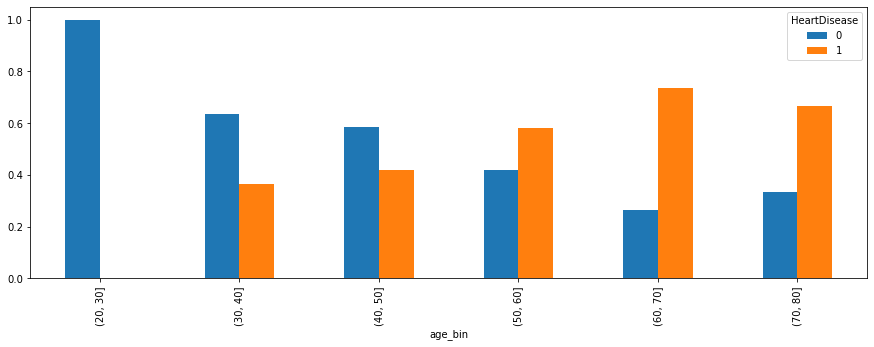

In [208]:
df_age.plot(kind='bar', figsize=(15, 5));

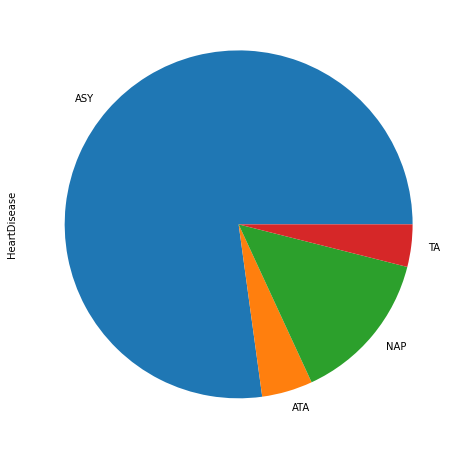

In [224]:
df.groupby('ChestPainType')['HeartDisease'].sum().plot(kind='pie',figsize=(8, 8));

In [226]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
init_notebook_mode(connected= True)

In [236]:
fig=px.pie(df,
           names=['Positive','Negative'],
           values=df['HeartDisease'].value_counts(),hole=0.5,
           title="<b>Precentage of Positive and Negative ",
           template='plotly',
           color_discrete_sequence=px.colors.qualitative.Pastel
          )
#            color_discrete_sequence=px.colors.qualitative.Pastel)

# fig.update_layout(title_font_size=25)
fig.show()

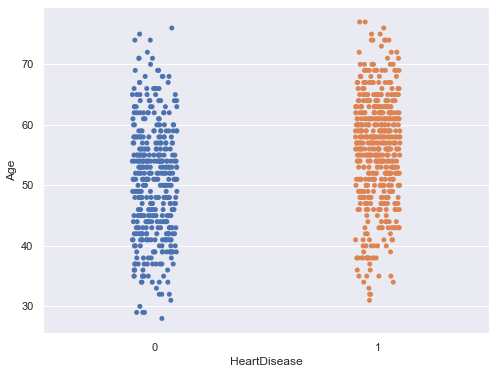

In [240]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="Age", x ="HeartDisease", data = df);

In [251]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

le = LabelEncoder()

df["Sex"] = le.fit_transform(df["Sex"])

In [252]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_bin
0,40,1,1,140,289,0,Normal,172,N,0.0,Up,0,"(30, 40]"
1,49,0,2,160,180,0,Normal,156,N,1.0,Flat,1,"(40, 50]"
2,37,1,1,130,283,0,ST,98,N,0.0,Up,0,"(30, 40]"
3,48,0,0,138,214,0,Normal,108,Y,1.5,Flat,1,"(40, 50]"
4,54,1,2,150,195,0,Normal,122,N,0.0,Up,0,"(50, 60]"


In [248]:
df.Sex.value_counts()

1    725
0    193
Name: Sex, dtype: int64

In [253]:
chest_le = LabelEncoder()
df["ChestPainType"] = chest_le.fit_transform(df["ChestPainType"])

In [254]:
chest_le

LabelEncoder()